# CaseStudy of Brazil Housing Data

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sb                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                         # for numerical computation

In [2]:
df=pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')
df[:5]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# Level 0 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

# There is no missing values in any columns

# Seperating the categorical column and numerical column for better understanding data

In [5]:
cat_df=df.select_dtypes(include='object')
cat_df

,city,animal,furniture
0,São Paulo,acept,furnished
1,São Paulo,acept,not furnished
2,Porto Alegre,acept,not furnished
3,Porto Alegre,acept,not furnished
4,São Paulo,not acept,not furnished
...,...,...,...
10687,Porto Alegre,not acept,furnished
10688,São Paulo,acept,not furnished
10689,Rio de Janeiro,not acept,furnished
10690,Rio de Janeiro,acept,furnished


In [6]:
num_df=df.select_dtypes(exclude='object')
num_df

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2,1,1,7,2065,3300,211,42,5618
1,320,4,4,0,20,1200,4960,1750,63,7973
2,80,1,1,1,6,1000,2800,0,41,3841
3,51,2,1,0,2,270,1112,22,17,1421
4,25,1,1,0,1,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...
10687,63,2,1,1,5,402,1478,24,22,1926
10688,285,4,4,4,17,3100,15000,973,191,19260
10689,70,3,3,0,8,980,6000,332,78,7390
10690,120,2,2,2,8,1585,12000,279,155,14020


# From the above data we can see that out 13 columns 3 are categorical and 10 are numerical

# Rio De Janeiro and sau paulo are among the most expensive cities to live in Brazil so many peaple from these cities are considering relocating to a different city to live and work remotely

In [7]:
city=['Porto Alegre','Campinas','Belo Horizonte']
data=df[df.city.isin(city)]
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


# Here we are considering only 3 cities by removing the rio de janeiro and sau paulo because these are expensive cities

# Objective: Finding the cheap city to live and work remotely for 1.Bachelors 2. Small family 3.Large family   

# 1. For Bachelors

#  Criteria: 1) 1 or 2 rooms are sufficent 2) 1 or 2 Bathroom 3) 1 or 2 parking spaces 4) Area:<=200

In [8]:
bach_df=data[(data.rooms.isin([1,2])&(data.bathroom.isin([1,2]))&(data['parking spaces'].isin([1,2]))&(data['area']<=200))]
bach_df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
27,Belo Horizonte,64,2,2,1,11,acept,not furnished,352,1500,80,20,1952
35,Porto Alegre,38,1,1,2,11,not acept,not furnished,450,1750,0,26,2226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648,Belo Horizonte,80,2,1,1,3,not acept,not furnished,240,1200,67,16,1523
10656,Campinas,140,1,2,2,15,acept,not furnished,1462,5200,284,66,7012
10665,Belo Horizonte,55,2,1,1,2,not acept,furnished,200,1600,75,22,1897
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447


# level 1: Univariate Analysis

<Axes: xlabel='city', ylabel='count'>

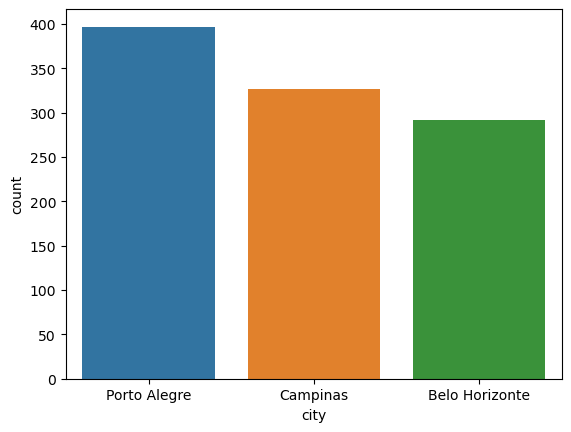

In [9]:
sb.countplot(x='city',data=bach_df)

# From the above criteria the graph shows that porto alegre city has more counts campare to other cities

<Axes: xlabel='floor', ylabel='count'>

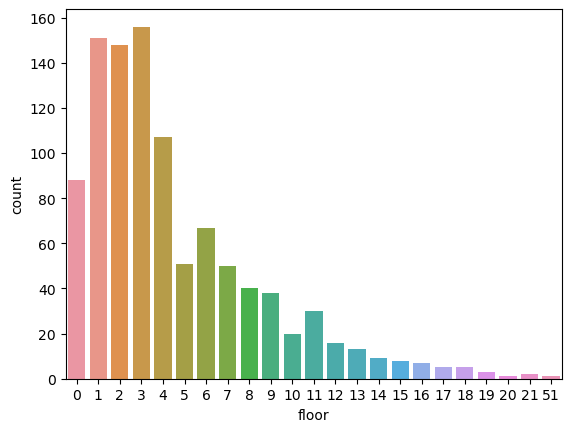

In [10]:
sb.countplot(x='floor',data=bach_df)

# Here we see that more rooms are available on ground floor to 4 th floor

<Axes: xlabel='furniture', ylabel='count'>

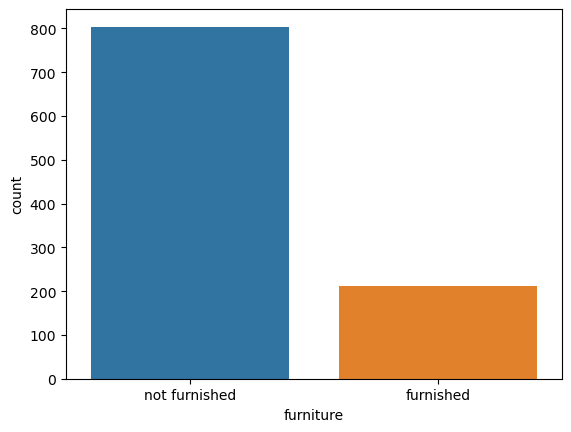

In [11]:
sb.countplot(x='furniture',data=bach_df)

# More such rooms are unfurnished

<Axes: xlabel='animal', ylabel='count'>

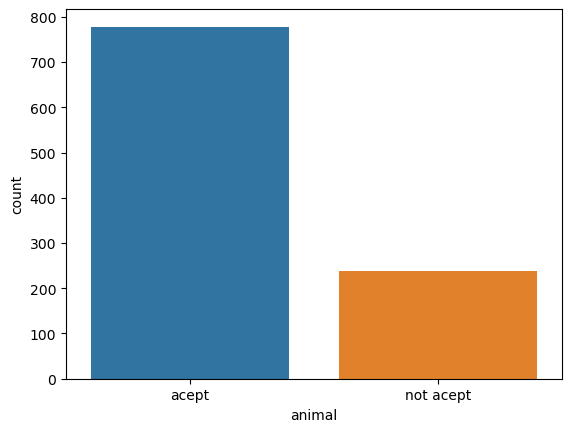

In [12]:
sb.countplot(x='animal',data=bach_df)

# More count for animal are accepted

<Axes: xlabel='rent amount (R$)', ylabel='Count'>

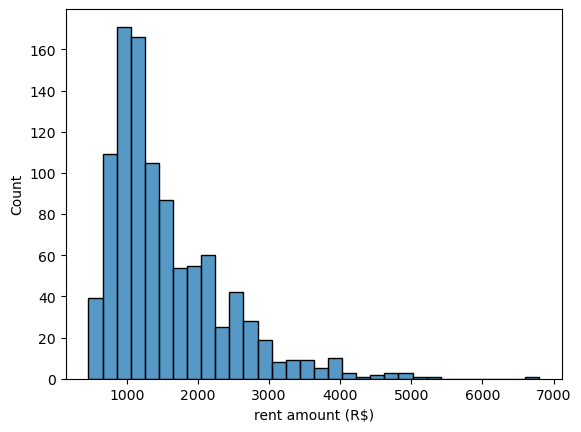

In [13]:
sb.histplot(x='rent amount (R$)',data=bach_df)

# From the graph we can say that More rooms rate are in  range of 800-1500 dollars

<Axes: xlabel='area', ylabel='Count'>

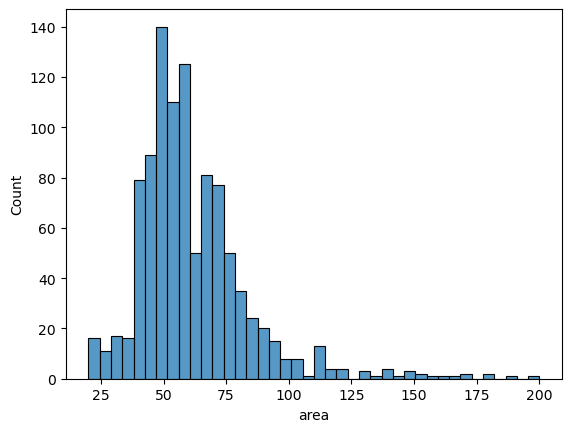

In [14]:
sb.histplot(x='area',data=bach_df)

# More rooms are avalible in the 50-70 sqft area 

<Axes: xlabel='property tax (R$)', ylabel='Count'>

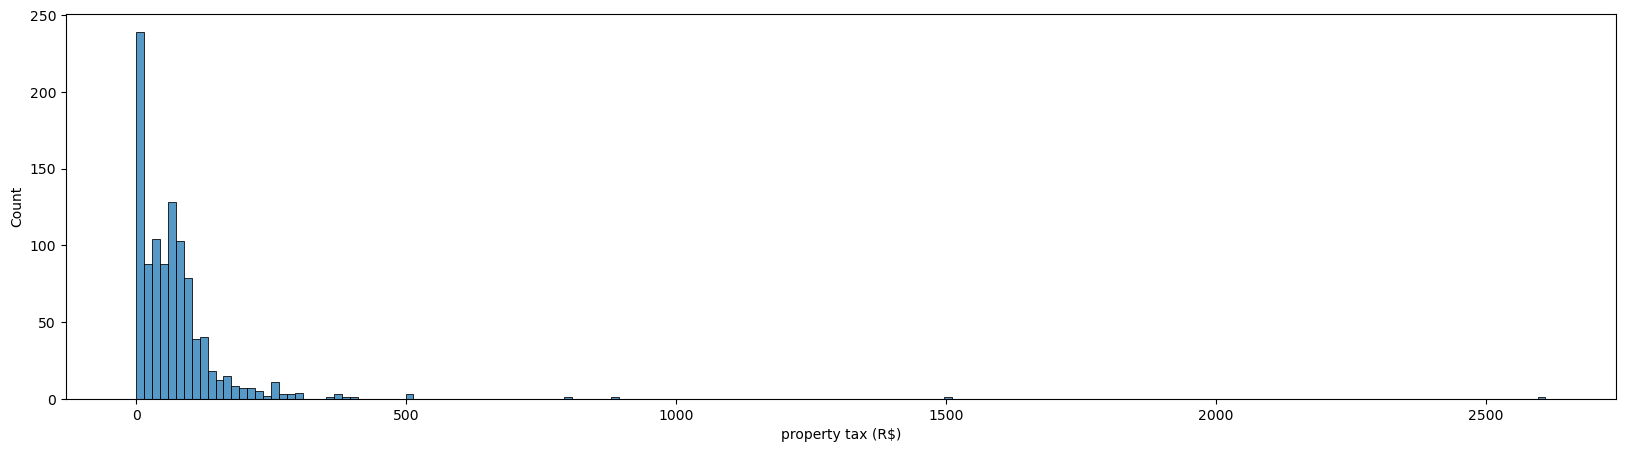

In [15]:
plt.figure(figsize=(20,5))
sb.histplot(x='property tax (R$)',data=bach_df)

# Property tax range is in between 0-200 dollars

# Level 2: Bivariate Analysis

In [16]:
bach_df[:5]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
27,Belo Horizonte,64,2,2,1,11,acept,not furnished,352,1500,80,20,1952
35,Porto Alegre,38,1,1,2,11,not acept,not furnished,450,1750,0,26,2226


<Axes: xlabel='city', ylabel='count'>

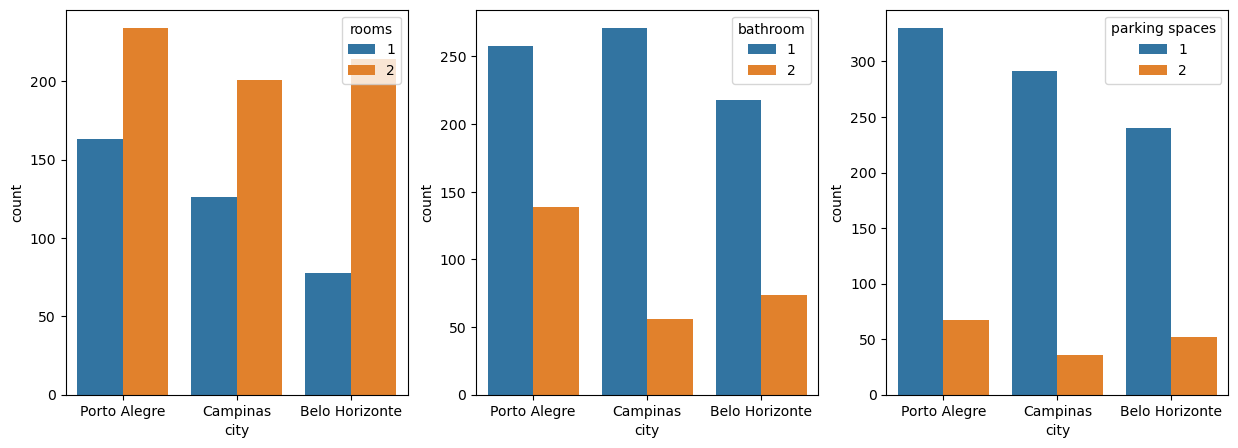

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sb.countplot(x='city',hue='rooms',data=bach_df)
plt.subplot(132)
sb.countplot(x='city',hue='bathroom',data=bach_df)
plt.subplot(133)
sb.countplot(x='city',hue='parking spaces',data=bach_df)

# 1. From the above graph we cay that more single room & double rooms are available in porto alegre city compare to others.
# 2. More single bathroom are available in Campinas city  and double Bathroom available in porto alegre city
# 3. For parking spaces porto alegre city has more count

<Axes: xlabel='city', ylabel='count'>

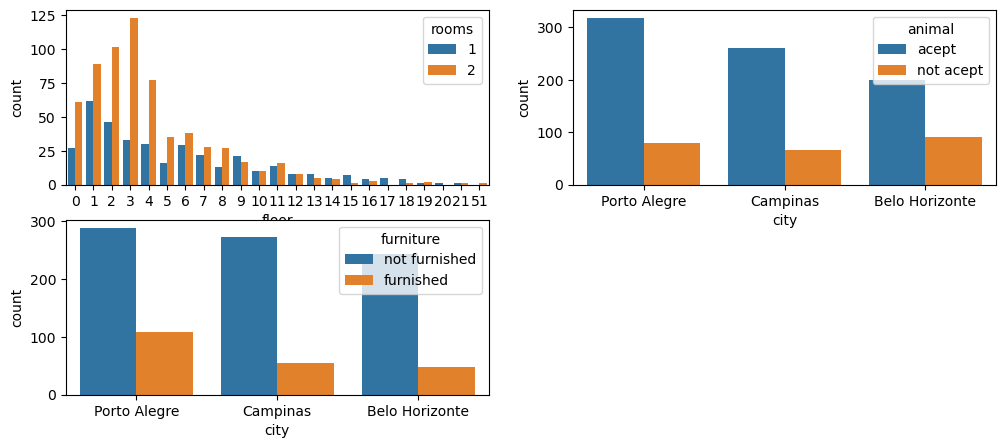

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(221)
sb.countplot(x='floor',hue='rooms',data=bach_df)
plt.subplot(222)
sb.countplot(x='city',hue='animal',data=bach_df)
plt.subplot(223)
sb.countplot(x='city',hue='furniture',data=bach_df)

# 1. Most single and double rooms are available in 1-4 floor
# 2. In Porto Alegre city animal is acepted more compare to others and not acepted in Belo Horizonte
# 3. In Porto Alegre city more rooms are furnished and less furnished in Belo Horizonte

<Axes: xlabel='hoa (R$)', ylabel='Count'>

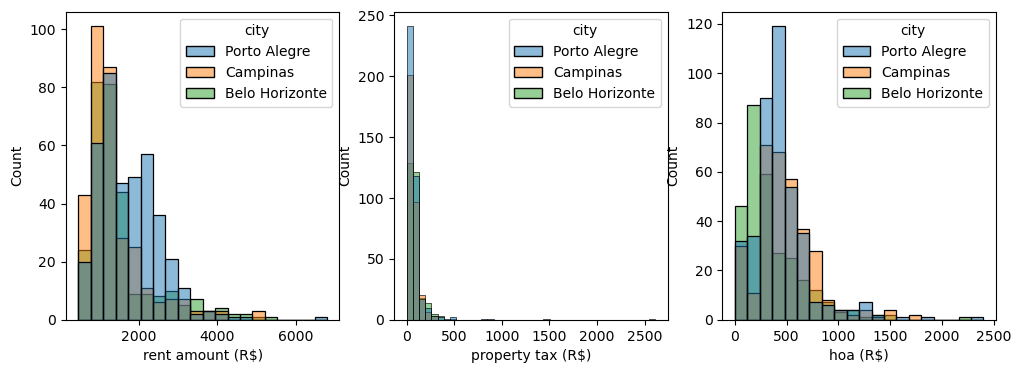

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sb.histplot(x='rent amount (R$)',hue='city',data=bach_df,bins=20)
plt.subplot(132)
sb.histplot(x='property tax (R$)',hue='city',data=bach_df,bins=40)
plt.subplot(133)
sb.histplot(x='hoa (R$)',hue='city',data=bach_df,bins=20)

# 1. Rental rate is less in Campinas city in range of 500-1500
# 2. Property Taxes is less in Porto Alegre city compare to others
# 3. Homeowner association tax is less in Belo Horizonte city

# Level 3: Multivariate Analysis

<Axes: xlabel='city', ylabel='rent amount (R$)'>

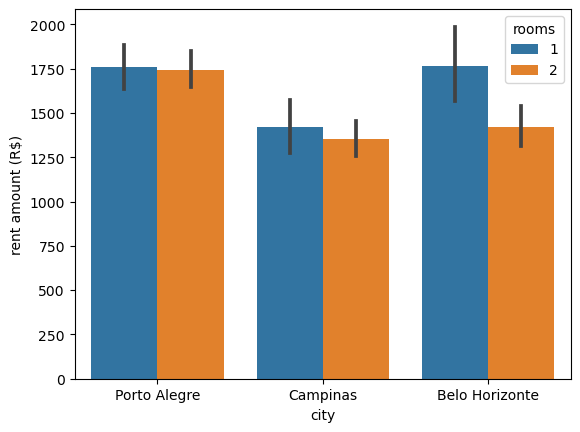

In [20]:
sb.barplot(x='city',y='rent amount (R$)',hue='rooms',data=bach_df)

# From the above chart we can say that single and double room rent is less in Campinas city and more in Porto Alegre city

# Interpretation:
# 1. Porto Alegre city: More single and double rooms are available, parking spaces is more,Animal accepted,Room Furnished,Less Property Tax,More Rent
# 2. Campinas City: Low rent,Animal not accepted,Unfurnished,More single Bathroom
# 3. Belo Horizonte: Less HAT Tax,More Property Tax

# Conclusion:
#  For Bachelors Campinas city is best bacause it has lowest rent in range of 500-1500 campare to other cities 
# For more facility then Porto Alegre is best but it has high rent

#  2. For Mid size Family

#  Criteria: 1) 3 or 4 rooms are sufficent 2)  2 or 3 Bathroom 3)  3 or 4 parking spaces

In [21]:
sf_df=data[(data.rooms.isin([3,4]))&(data.bathroom.isin([2,3]))&(data['parking spaces'].isin([3,4]))]
sf_df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
28,Campinas,208,3,2,4,0,acept,not furnished,0,3180,100,48,3328
70,Belo Horizonte,220,4,2,3,3,acept,not furnished,450,2422,125,33,3030
77,Belo Horizonte,170,4,3,4,9,not acept,not furnished,744,2700,296,36,3776
107,Campinas,284,4,3,3,4,acept,not furnished,2340,6000,483,77,8900
200,Belo Horizonte,300,3,2,3,0,not acept,not furnished,0,6700,539,110,7349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10539,Campinas,144,3,2,3,0,acept,not furnished,890,4000,138,61,5089
10544,Campinas,202,3,2,4,0,acept,not furnished,0,3500,608,53,4161
10617,Belo Horizonte,169,3,2,4,0,acept,not furnished,0,3200,109,53,3362
10659,Campinas,150,3,2,4,0,acept,furnished,0,3500,186,53,3739


# Level-1 Univariate Analysis

<Axes: xlabel='city', ylabel='count'>

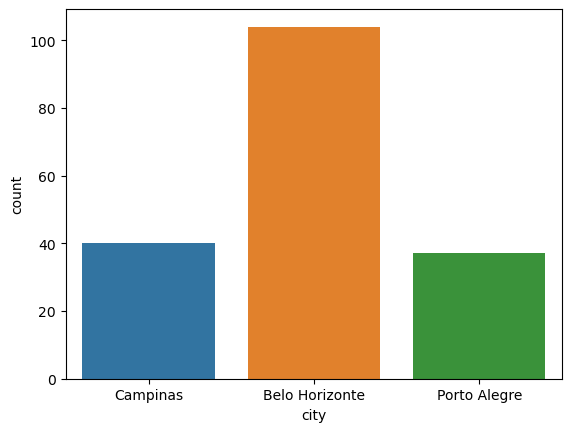

In [22]:
sb.countplot(x='city',data=sf_df)

# From the above criteria the graph shows that Belo Horizonte city has more counts campare to other cities

<Axes: xlabel='floor', ylabel='count'>

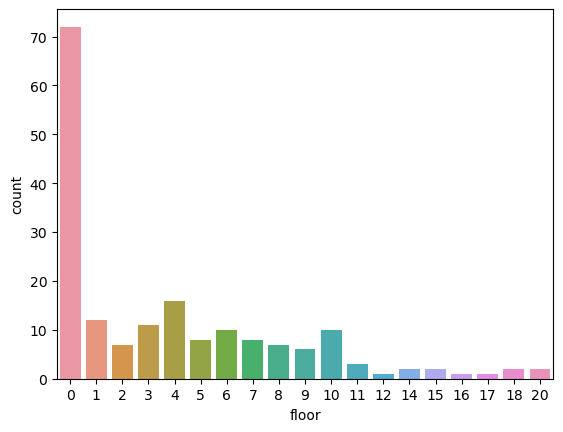

In [23]:
sb.countplot(x='floor',data=sf_df)

#  Here we see that more rooms are available on ground floor

<Axes: xlabel='furniture', ylabel='count'>

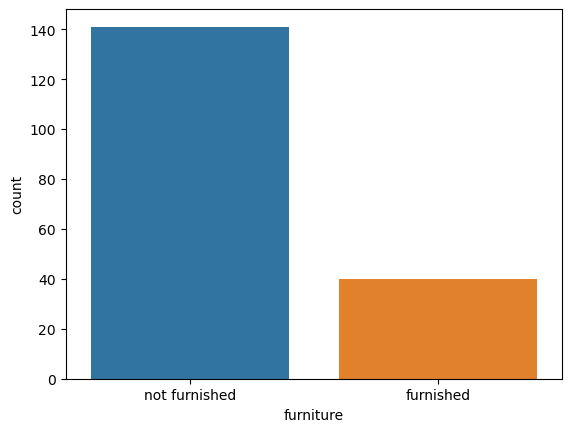

In [25]:
sb.countplot(x='furniture',data=sf_df)

# More counts for not furnished houses

<Axes: xlabel='animal', ylabel='count'>

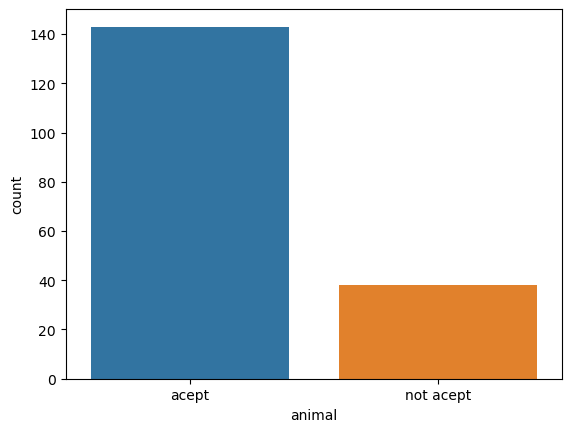

In [26]:
sb.countplot(x='animal',data=sf_df)

#  More count for animal are accepted

<Axes: xlabel='area', ylabel='Count'>

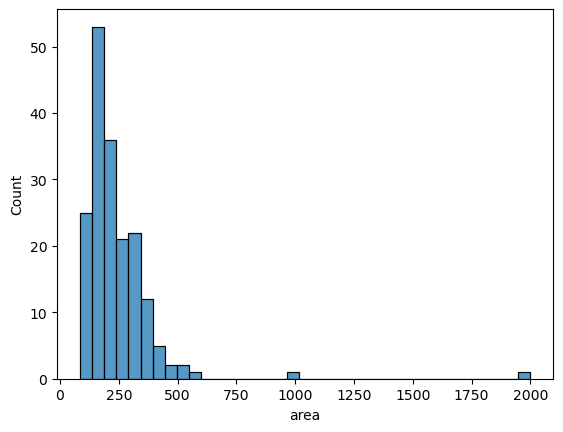

In [28]:
sb.histplot(x='area',data=sf_df)

#  More rooms are avalible in the 200-250 sqft area 

<Axes: xlabel='rent amount (R$)', ylabel='Count'>

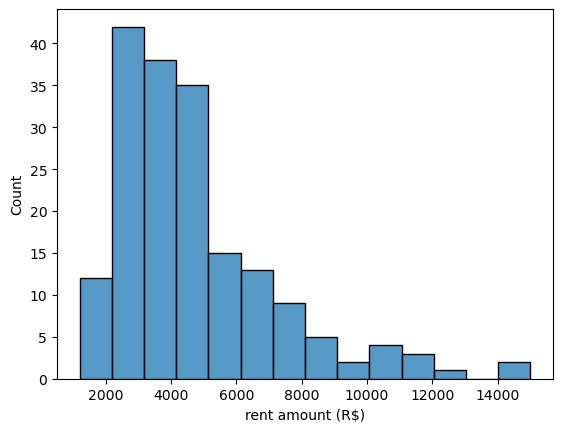

In [29]:
sb.histplot(x='rent amount (R$)',data=sf_df)

#  From the graph we can say that More rooms rate are in  range of 2000-5000 dollars

<Axes: xlabel='property tax (R$)', ylabel='Count'>

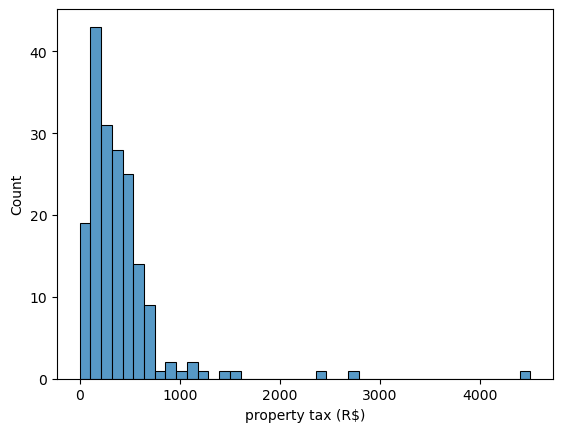

In [30]:
sb.histplot(x='property tax (R$)',data=sf_df)

#  Property tax range is in between 0-600 dollars

# Level -2 Bivariate Analysis

In [31]:
sf_df[:5]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
28,Campinas,208,3,2,4,0,acept,not furnished,0,3180,100,48,3328
70,Belo Horizonte,220,4,2,3,3,acept,not furnished,450,2422,125,33,3030
77,Belo Horizonte,170,4,3,4,9,not acept,not furnished,744,2700,296,36,3776
107,Campinas,284,4,3,3,4,acept,not furnished,2340,6000,483,77,8900
200,Belo Horizonte,300,3,2,3,0,not acept,not furnished,0,6700,539,110,7349


<Axes: xlabel='city', ylabel='count'>

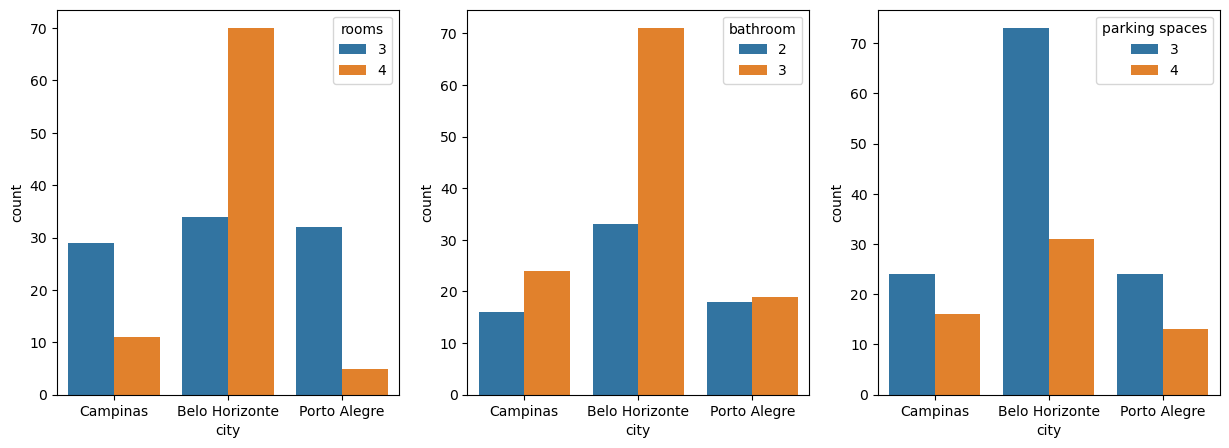

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sb.countplot(x='city',hue='rooms',data=sf_df)
plt.subplot(132)
sb.countplot(x='city',hue='bathroom',data=sf_df)
plt.subplot(133)
sb.countplot(x='city',hue='parking spaces',data=sf_df)

#  1. From the above graph we cay that more number of 3 and 4 room are available in  Belo Horizonte city compare to other cities
# 2. More number of Bathroom are available in Belo Horizonte city
# 3. For parking spaces are available in Belo Horizonte city

<Axes: xlabel='city', ylabel='count'>

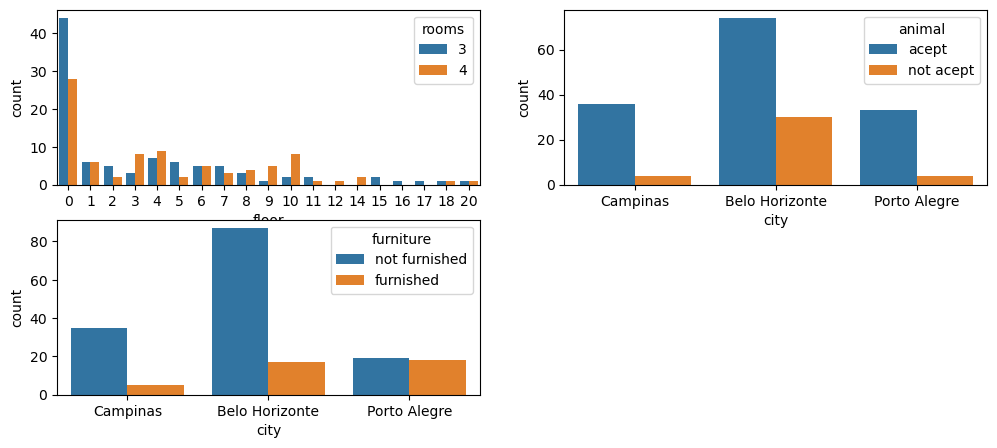

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(221)
sb.countplot(x='floor',hue='rooms',data=sf_df)
plt.subplot(222)
sb.countplot(x='city',hue='animal',data=sf_df)
plt.subplot(223)
sb.countplot(x='city',hue='furniture',data=sf_df)

#  1. Most of the rooms are available on ground floor
# 2. In Belo Horizonte city animal is acepted more compare to other cities
# 3. In Belo Horizonte city more rooms are furnished and unfurnished

<Axes: xlabel='hoa (R$)', ylabel='Count'>

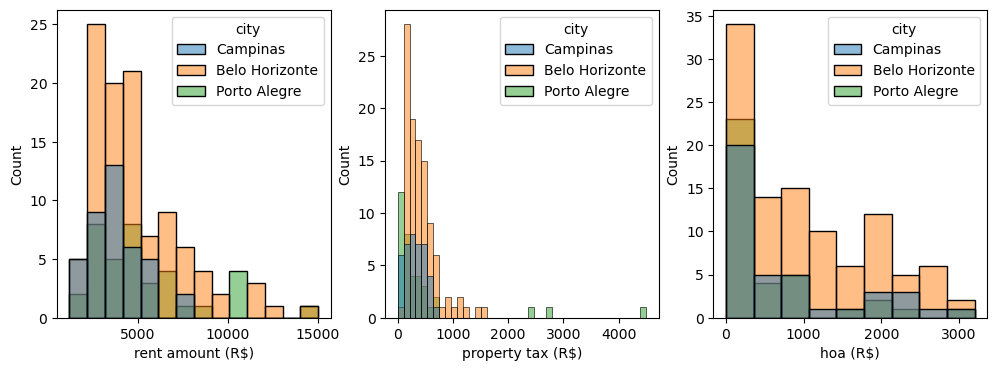

In [34]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sb.histplot(x='rent amount (R$)',hue='city',data=sf_df)
plt.subplot(132)
sb.histplot(x='property tax (R$)',hue='city',data=sf_df)
plt.subplot(133)
sb.histplot(x='hoa (R$)',hue='city',data=sf_df)

# 1. Rental rate is less in Belo Horizonte city in range of 2000-5000
# 2. Property Taxes is less in Belo Horizonte city compare to other cities
# 3. Homeowner association tax is less in Belo Horizonte city

# Interpretation:
# 1. Porto Alegre city: Less rooms are available, parking spaces is Less,Animal accepted less,Room Unfurnished,More Property Tax,More Rent
# 2. Belo Horizonte City: Low rent,Animal accepted more,Furnished,More  Bathroom,More parking spaces,less property tax, Less HAT Tax
# 3. Campinas city:animals not accepted, less furnished rooms

#  Conclusion:
#  For Mid size family Belo Horizonte city is best bacause it has lowest rent campare to other cities and also gives more facility 

#  3. For  Large Family

#  Criteria: 1) Greater than 4 rooms are sufficent 2)  >=4 Bathroom 3)  >=5 parking spaces

In [36]:
lf_df=data[(data.rooms>=4)&(data.bathroom>=4)&(data['parking spaces']>=5)]
lf_df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
143,Campinas,999,5,7,8,0,acept,not furnished,0,14000,667,211,14880
241,Belo Horizonte,570,5,6,7,0,acept,furnished,0,8330,873,137,9340
534,Belo Horizonte,548,4,7,6,17,acept,not furnished,5905,15000,2484,200,23590
564,Belo Horizonte,300,5,5,5,0,not acept,not furnished,0,4500,450,74,5024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,Porto Alegre,600,5,7,5,0,acept,not furnished,0,7000,834,125,7959
10507,Belo Horizonte,420,4,4,5,0,acept,not furnished,0,9000,0,148,9148
10563,Belo Horizonte,274,4,5,5,10,not acept,not furnished,2450,13000,179,174,15800
10587,Belo Horizonte,500,8,5,8,0,acept,not furnished,0,5000,150,82,5232


# # Level-1 Univariate Analysis

<Axes: xlabel='city', ylabel='count'>

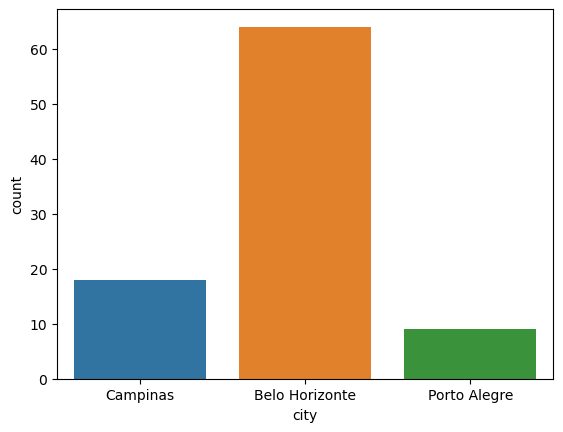

In [37]:
sb.countplot(x='city',data=lf_df)

#  From the above criteria the graph shows that Belo Horizonte city has more counts campare to other cities

<Axes: xlabel='floor', ylabel='count'>

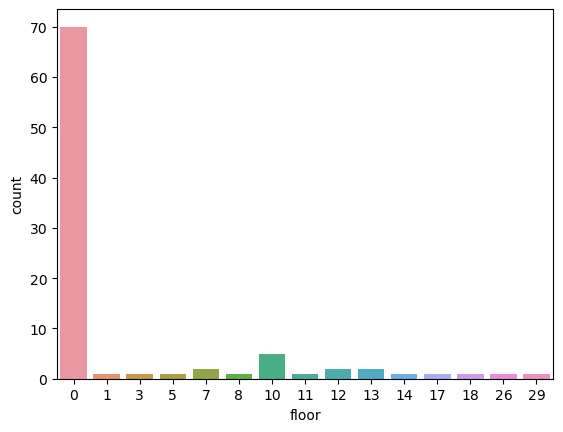

In [38]:
sb.countplot(x='floor',data=lf_df)

#  Here we see that more rooms are available on ground floor

<Axes: xlabel='furniture', ylabel='count'>

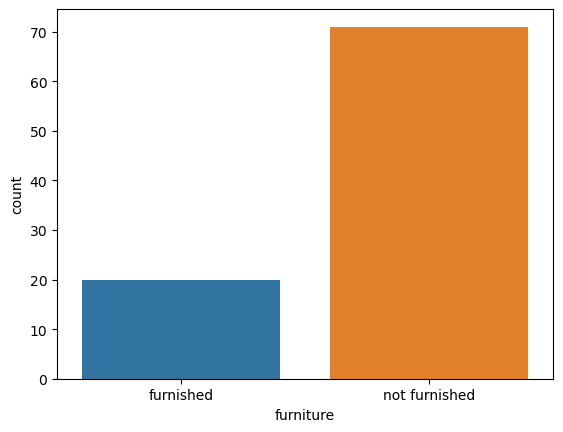

In [39]:
sb.countplot(x='furniture',data=lf_df)

# More counts for not furnished houses

<Axes: xlabel='animal', ylabel='count'>

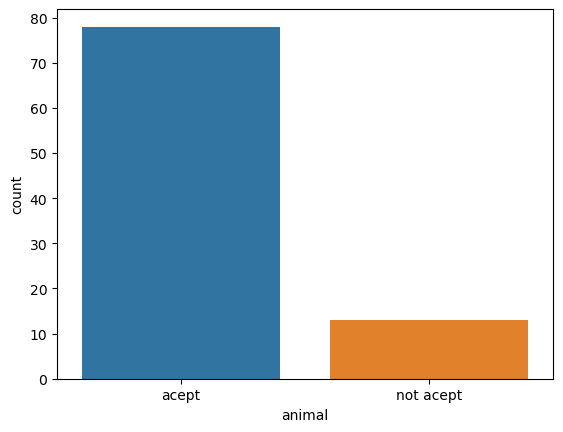

In [40]:
sb.countplot(x='animal',data=lf_df)

#  More count for animal are accepted

<Axes: xlabel='area', ylabel='Count'>

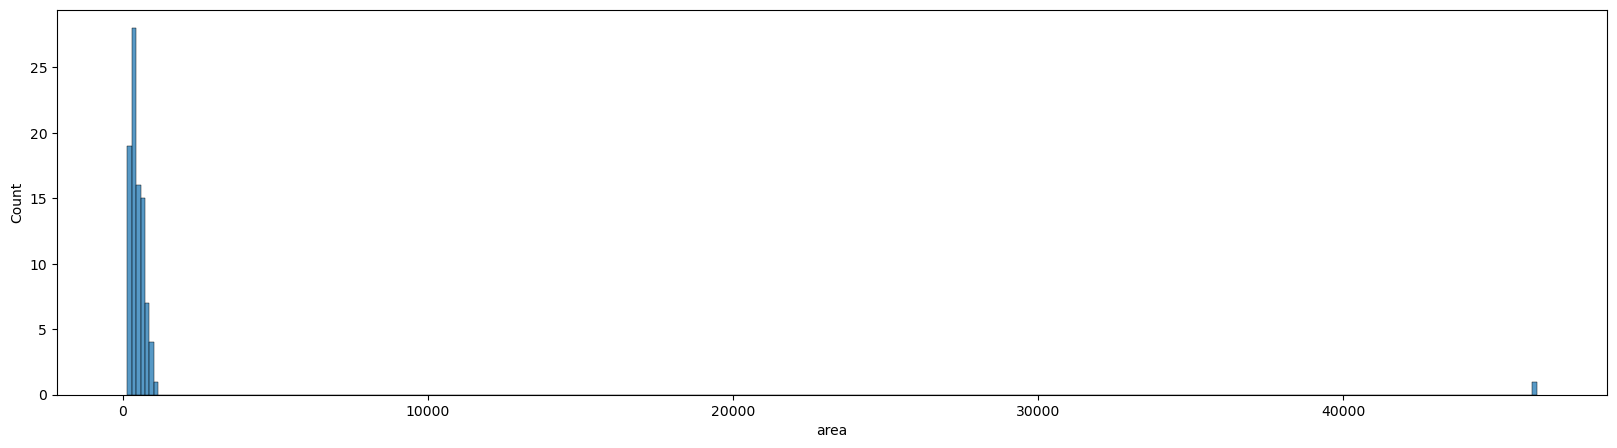

In [44]:
plt.figure(figsize=(20,5))
sb.histplot(x='area',data=lf_df)

<Axes: xlabel='rent amount (R$)', ylabel='Count'>

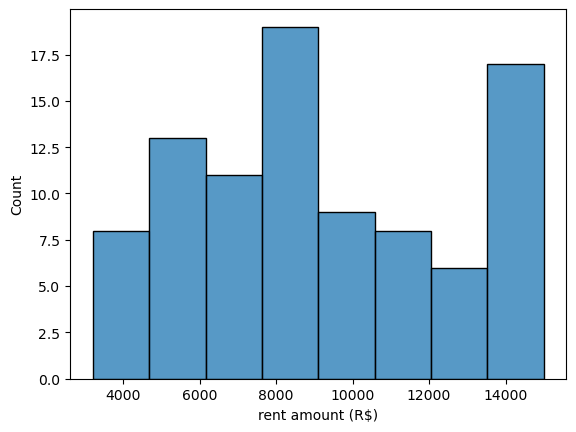

In [45]:
sb.histplot(x='rent amount (R$)',data=lf_df)

#  From the graph we can say that More rooms rate are in  range of 8000 and above dollars

<Axes: xlabel='property tax (R$)', ylabel='Count'>

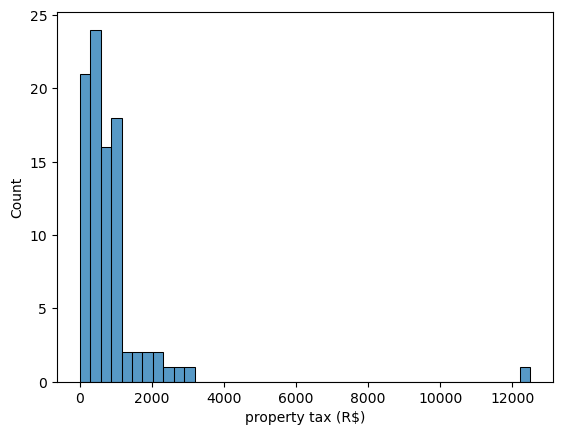

In [46]:
sb.histplot(x='property tax (R$)',data=lf_df)

#  Property tax range is in between 0-1000 dollars

# Level -2 Bivariate Analysis

In [47]:
lf_df[:5]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
143,Campinas,999,5,7,8,0,acept,not furnished,0,14000,667,211,14880
241,Belo Horizonte,570,5,6,7,0,acept,furnished,0,8330,873,137,9340
534,Belo Horizonte,548,4,7,6,17,acept,not furnished,5905,15000,2484,200,23590
564,Belo Horizonte,300,5,5,5,0,not acept,not furnished,0,4500,450,74,5024


<Axes: xlabel='city', ylabel='count'>

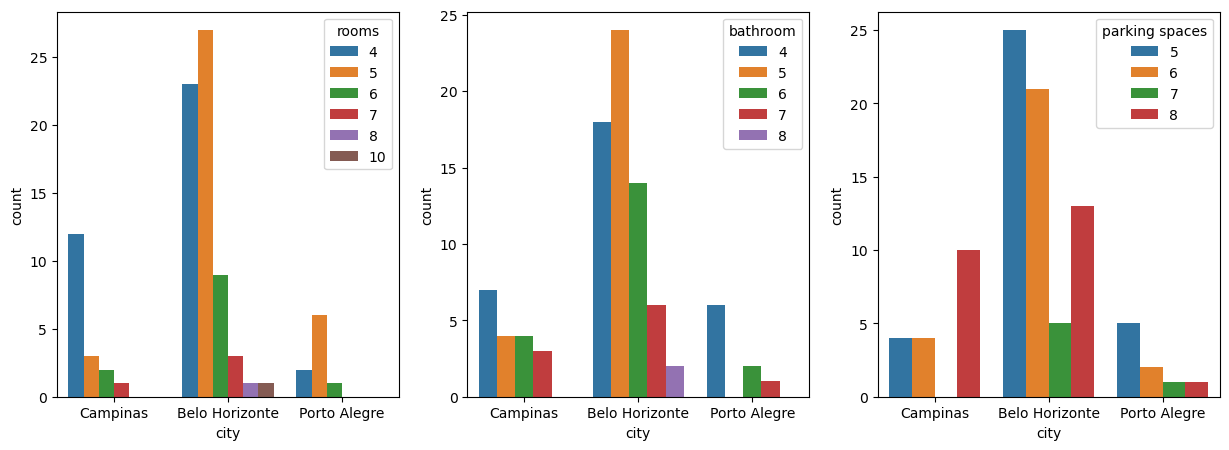

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sb.countplot(x='city',hue='rooms',data=lf_df)
plt.subplot(132)
sb.countplot(x='city',hue='bathroom',data=lf_df)
plt.subplot(133)
sb.countplot(x='city',hue='parking spaces',data=lf_df)

#  1. From the above graph we cay that more number of rooms are available in  Belo Horizonte city compare to other cities
# 2. More number of Bathroom are available in Belo Horizonte city
# 3. For parking spaces are available in Belo Horizonte city

<Axes: xlabel='city', ylabel='count'>

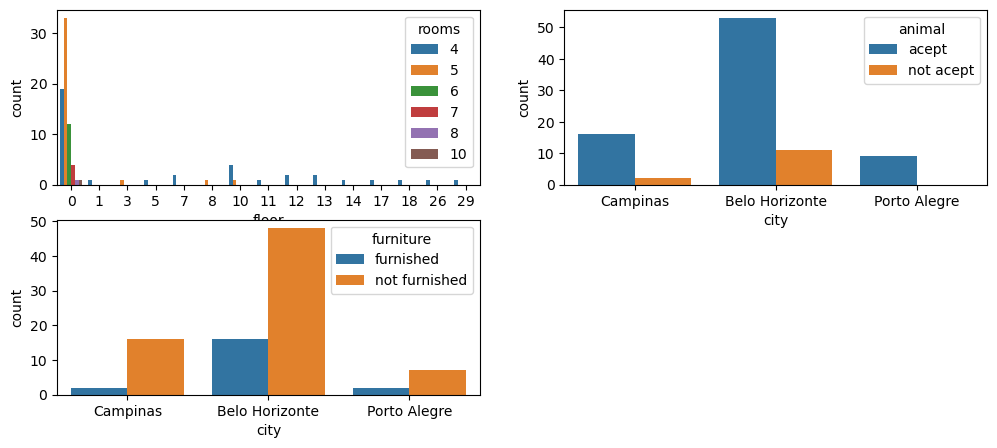

In [49]:
plt.figure(figsize=(12,5))
plt.subplot(221)
sb.countplot(x='floor',hue='rooms',data=lf_df)
plt.subplot(222)
sb.countplot(x='city',hue='animal',data=lf_df)
plt.subplot(223)
sb.countplot(x='city',hue='furniture',data=lf_df)

# 1. Most of the rooms are available on ground floor
# 2. In Belo Horizonte city animal is acepted more compare to other cities
# 3. In Belo Horizonte city more rooms are furnished and unfurnished

<Axes: xlabel='hoa (R$)', ylabel='Count'>

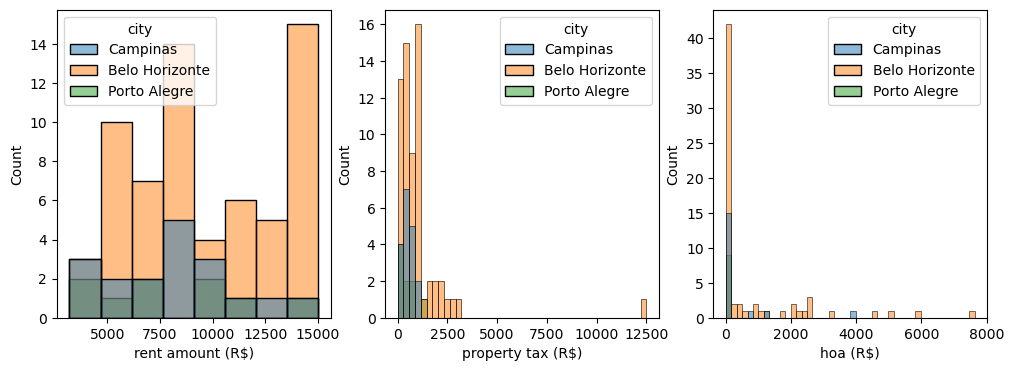

In [50]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sb.histplot(x='rent amount (R$)',hue='city',data=lf_df)
plt.subplot(132)
sb.histplot(x='property tax (R$)',hue='city',data=lf_df)
plt.subplot(133)
sb.histplot(x='hoa (R$)',hue='city',data=lf_df)

# 1. Rental rate is less in Belo Horizonte city compare to other cities
# 2. Property Taxes is less in Belo Horizonte city compare to other cities
# 3. Homeowner association tax is less in Belo Horizonte city

# Interpretation:
# 1. Porto Alegre city: Less rooms are available, parking spaces is Less,Animal accepted less,Room Unfurnished,More Property Tax,More Rent
# 2. Belo Horizonte City: Low rent,Animal accepted more,Furnished,More  Bathroom,More parking spaces,less property tax, Less HAT Tax
# 3. Campinas city:animals not accepted, less furnished rooms

#  Conclusion:
#  For Large family Belo Horizonte city is best bacause it has lowest rent campare to other cities and also gives more facility